In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

# Setup

A study was done to see if different forms of audio would have an effect on the level of pain reported by patients.  The data is made up, but in a way to draw the same conclusions.  Original study can be found [here](https://www.npr.org/sections/health-shots/2015/06/22/415048075/to-ease-pain-reach-for-your-playlist-instead-of-popping-a-pill).

<p align='center'>
    <img width='50%' src='https://whyy.org/wp-content/uploads/2017/07/painscale-768x432.jpg'>
</p>

## Read and Inspect

In [3]:
import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.graphics.gofplots import qqplot

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# fmt: off
audio_book = np.array([7.5, 4. , 4. , 3. , 6.5, 1. , 8. , 4. , 5.5, 4.5, 7.5, 1.5, 4.5,
                       4.5, 7. , 3. , 4.5, 3.5, 5. , 6. , 3. , 7. , 6.5, 6. , 6.5, 4. ,
                       5. , 3.5, 4.5, 6. , 4. , 4.5, 4. , 3.5, 4. , 5. , 3. , 5.5, 8. ,
                       6.5, 4.5, 3.5, 4. , 8. , 5. , 4. , 5.5, 8.5, 5. , 6. , 5.5, 4.5,
                       3. , 4.5, 4.5, 6. , 6.5, 6.5, 5.5, 6.5, 4. , 7. , 6. , 4.5, 6. ,
                       5. , 7. , 7.5, 8.5, 2.5, 2.5, 4. , 5.5, 6.5, 5.5, 1.5, 4.5, 6.5,
                       5.5, 6.5, 4.5, 4.5, 5.5, 5.5, 5.5, 5. , 4. , 5.5, 5. , 7. , 7. ,
                       5.5, 4.5, 4. , 5.5, 5. , 4.5, 5. , 4. , 6. ])


control = np.array([ 6. ,  8.5,  7.5,  7.5,  5. ,  7. ,  8. ,  5. ,  6. ,  6.5,  4.5,
                    7. ,  8. ,  5.5,  7.5,  4.5,  6.5,  4. ,  8.5,  7.5,  6.5,  5.5,
                    9. , 10. ,  3.5,  9. ,  9.5,  7.5,  4.5,  8. ,  6.5,  5.5,  4.5,
                    7.5,  8. ,  5.5,  7.5,  5. ,  8. ,  7. ,  6.5,  6.5,  8. ,  8. ,
                    7.5,  7. ,  7. ,  7.5,  7. ,  8. ,  6. ,  2.5,  8.5, 10. ,  7.5,
                    6.5,  6.5,  6.5,  6.5,  5. ,  6. ,  5. ,  7. ,  6. ,  7.5,  6.5,
                    8.5,  7. , 10. ,  3.5,  5.5,  8. , 10. ,  6.5,  7. ,  6.5,  9. ,
                    6. ,  8. ,  6. ,  4.5,  7. ,  7.5,  9. ,  6.5,  5.5,  7.5,  7. ,
                    7. ,  6.5,  8.5,  7.5, 10. ,  8.5,  8. ,  4. ,  7.5,  7.5,  8. ,
                    8.5])


music = np.array([4. , 6. , 3.5, 8. , 2.5, 1.5, 2. , 3. , 3. , 8. , 4. , 2.5, 6.5,
                  3.5, 2.5, 6. , 5.5, 4. , 7. , 5. , 7.5, 5.5, 7. , 5. , 2.5, 8.5,
                  3.5, 4.5, 3.5, 4.5, 5. , 5. , 5.5, 7.5, 4.5, 2.5, 2.5, 3.5, 2. ,
                  6. , 4. , 4. , 4.5, 2.5, 3. , 5.5, 5.5, 4. , 7.5, 2.5, 4. , 4. ,
                  0. , 8. , 5. , 3. , 8. , 5.5, 5.5, 3.5, 5. , 2. , 6. , 4. , 5. ,
                  6.5, 5. , 5. , 5. , 3.5, 6. , 7. , 6. , 6. , 3. , 3. , 2. , 6.5,
                  4. , 7. , 3.5, 4. , 5. , 6. , 4.5, 5. , 4.5, 5. , 3. , 5. , 4.5,
                  4.5, 5.5, 3.5, 4.5, 4. , 5.5, 6. , 3. , 5.5])
# fmt: on

pain = pd.DataFrame({"audio_book": audio_book, "music": music, "control": control,})

<IPython.core.display.Javascript object>

In [4]:
pain.shape

(100, 3)

<IPython.core.display.Javascript object>

In [5]:
pain.head()

,audio_book,music,control
0,7.5,4.0,6.0
1,4.0,6.0,8.5
2,4.0,3.5,7.5
3,3.0,8.0,7.5
4,6.5,2.5,5.0


<IPython.core.display.Javascript object>

This data frame has a little different format than we've been using.  It might be just fine to continue with the analysis as is, but for extra practice, let's reformat this data to be taller.

* Reformat the data to have 2 columns: `'treatment'` & `'pain'`. Where `'treatment'` holds the value of `['audio_book', 'music', 'control']` & `'pain'` holds the score.

In [6]:
tall_pain = pd.melt(pain, var_name="treatment", value_name="pain")
tall_pain

,treatment,pain
0,audio_book,7.5
1,audio_book,4.0
2,audio_book,4.0
3,audio_book,3.0
4,audio_book,6.5
...,...,...
295,control,4.0
296,control,7.5
297,control,7.5
298,control,8.0


<IPython.core.display.Javascript object>

Visualize the data by group somehow, which treatment group(s) appear to be the most effective at reducing pain?  Which appear to be the least effective?

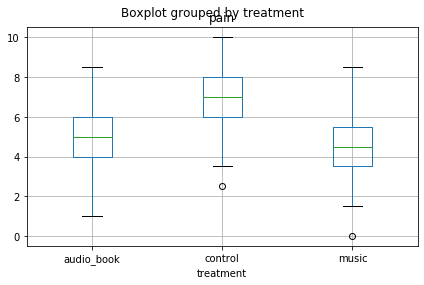

<IPython.core.display.Javascript object>

In [12]:
tall_pain.boxplot("pain", by="treatment")
plt.tight_layout()
plt.show()

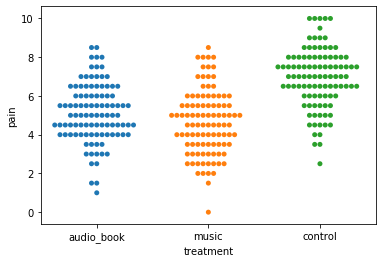

<IPython.core.display.Javascript object>

In [13]:
sns.swarmplot("treatment", "pain", data=tall_pain)

## ANOVA Mechanics

Warning, a bunch of math symbols below.

### Intuition

Before we get there, lets talk about the intuition behind the **An**alysis **o**f **Va**riance test.  Why are we talking about variance when we really care about different means?

<p align='center'>
  <img src='https://i.imgur.com/gUbLdVo.png' width=50%>
</p>

The question in the above image seems obvious to us, but think through why it's obvious.  We know the marble came from B because:

1. every marble in group A is similar
* every marble in group B is similar
* the groups are not similar to each other

Here's the statistics way to say those reasons.

1. the variance of group A is small
* the variance of group B is small
* the between group variance is large

Let's look at the other ways this can play out.

<p align='center'>
  <img src='https://i.imgur.com/BIAFmvS.png' width=50%>
</p>

Using the same reasoning as above, why can't we make a good guess on which group this marble came from?

And last one...

<p align='center'>
  <img src='https://i.imgur.com/BEQdC84.png' width=50%>
</p>

Why can't we make a good guess on which group this marble came from?

The ANOVA uses the same logic we just used in that marble guessing.  An ANOVA is checking if groups are more similiar within group or if their more similar between groups.  If the data is more similar within groups than it is between groups (the first marble pic), then ANOVA says there's a significant difference.  If the data is more similar between groups than it is within groups (the last 2 marble pics), then ANOVA says there's not a significant difference.

### Math

As we talked about in the intuition section, an ANOVA wants to compare within group variance to between group variance.  The formula for our ANOVA (aka $F$ test) can be thought of as:

$$F = \frac{Variance_{between}}{Variance_{within}}$$

If we have a large value of $F$, we will have a statistically significant result.  Reason through this formula with our marble example.

Note this isn't actually how it's written, but this is a good way to think about it.  To get formal with all of the math:

---

$$F = \frac{MS_{between}}{MS_{within}}$$

* $MS_{between}$ is the mean square error between groups
* $MS_{within}$ is the mean square error within groups

---

$$MS_{between} = \frac{SS_{between}}{n - k}$$
$$MS_{within} = \frac{SS_{within}}{k - 1}$$

* $SS_{between}$ is the sum of squared errors between groups
* $SS_{within}$ is the sum of squared errors within groups
* $n$ is the total number of observations
* $k$ is the number of groups

---

$$SS_{between} = \sum^k_{j=1}n_j(\overline{x}_j - \overline{x})^2$$
$$SS_{within} = \sum^k_{j=1}\sum^{n_j}_{i=1}(x_{ij} - \overline{x}_j)^2$$

* $\overline{x}_j$ is the mean of group $j$
* $\overline{x}$ is the overall mean
* $x_{ij}$ is the $i$th observation of group $j$
* $n_j$ is the number of observations in group $j$
* $k$ is the number of groups

---

Attempt to translate the process into english:

* Calculate $SS_{between}$ by comparing each group mean to the overall mean
* To calculate $SS_{within}$, for each group, compare each group observation to its group mean.
* To standardize both of these sums we take their average. Instead of dividing by the number of items added together, we divide by info about both the number of groups and number of observations.
* Last, compare these metrics of between group and within group variance by dividing them.

## ANOVA Assumptions

From wikipedia:

> * Response variable residuals are normally distributed (or approximately normally distributed).
> * Variances of populations are equal.
> * Responses for a given group are independent and identically distributed normal random variables.

### Normality!

As pointed out by this [StackExchange question](https://stats.stackexchange.com/q/60410/102646), this assumption isn't the most clearly communicated thing across the internet.

[This resource](https://www.theanalysisfactor.com/checking-normality-anova-model/) lays out a nice summary to hopefully clear up some confusion.

> The normality assumption is that residuals follow a normal distribution.
>
> ...
>
> But what it’s really getting at is the distribution of Y|X.   That’s Y given the value of X.  Because X values are considered fixed, they have no distributions.  Residuals have the same distribution as Y|X.  If residuals are normally distributed, it means that Y is normally distributed within a value of X (not necessarily overall).
>
> ...
>
> But when predictors are categorical, there are usually just a few values of X (the categories), and there are many observations at each value of X.  So you’ll often see the normality assumption for an ANOVA stated as:
>
> “The distribution of Y within each group is normally distributed.”  It’s the same thing as Y|X and in this context, it’s the same as saying the residuals are normally distributed.
>
> ...
>
> So in ANOVA, you actually have two options for testing normality.  If there really are many values of Y for each value of X (each group), and there really are only a few groups (say, four or fewer), go ahead and check normality separately for each group.
>
> But if you have many groups (a 2x2x3 ANOVA has 12 groups) or if there are few observations per group (it’s hard to check normality on only 20 data points), it’s often easier to just use the residuals and check them all together.

In this notebook, let's check both ways.

#### Shapiro-Wilk

From [`scipy.stats.shapiro` documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html):

> The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.

* $H_o$: data was drawn from a normal distribution
* $H_a$: data was not drawn from a normal distribution

You'll often see it noted that for large sample sizes, even slight deviations from normality are detected.  Also, like the t-test, ANOVA is fairly robust to deviations from normality.

In practice, be cautious with blindly trusting this normality test.  Just like in a t-test, p-values don't tell the whole story.

#### [QQ Plots](https://www.youtube.com/watch?v=okjYjClSjOg&vl=en)

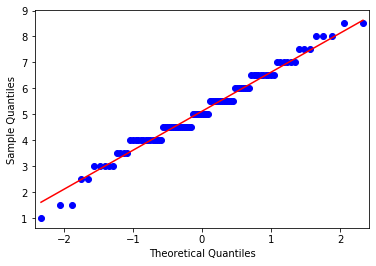

<IPython.core.display.Javascript object>

In [14]:
qqplot(audio_book, line="s")
plt.show()

* Create and interpret qqplots for the remaining 2 groups.

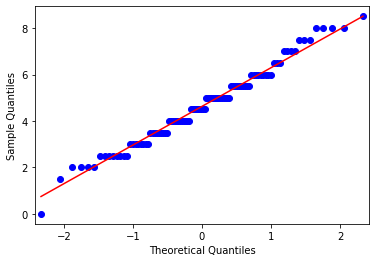

<IPython.core.display.Javascript object>

In [15]:
qqplot(music, line="s")
plt.show()

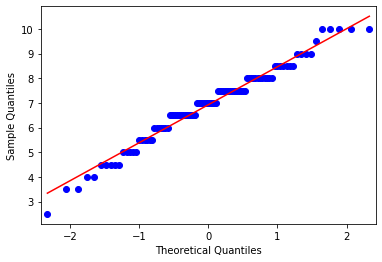

<IPython.core.display.Javascript object>

In [16]:
qqplot(control, line="s")
plt.show()

### Variance!

From [`scipy.stats.bartlett` documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bartlett.html):

> Bartlett’s test tests the null hypothesis that all input samples are from populations with equal variances.

* $H_o$: all input samples are from populations with equal variances
* $H_a$: all input samples are not from populations with equal variances

Before we run a formal test, let's show the standard deviation of each group sample.

In [17]:
tall_pain.groupby("treatment").std()

,pain
treatment,
audio_book,1.514000
control,1.546216
music,1.673652


<IPython.core.display.Javascript object>

Now let's run the more formal test.  Note, like Shapiro-Wilk, this test can also be sensitive; a p-value from this test should not be you're only consideration.  Levene's test is sometimes used as an alternative.

In [19]:
stats.bartlett(audio_book, music, control)

BartlettResult(statistic=1.1190270539589557, pvalue=0.5714870092484428)

<IPython.core.display.Javascript object>

## Is there a difference in level of pain reported between the groups?

We have 3 groups, doing repeated t-tests would be compounding our chance of Type I error.  To combat this, we can use a one-way ANOVA.  For this, we can use `scipy` or `statsmodels`.  Below is how we can do this `scipy`, we'll dig more into `statsmodels` output/options.

In the first cell of the notebook, the data is loaded into distinct variables, this is how `scipy.stats.f_oneway` is expecting the data.

What do we conclude?

* $H_o$: The mean is the same for all groups
* $H_a$: The mean is not the same for all groups (doesn't say what mean(s) is/are different)

In [20]:
f, p = stats.f_oneway?

<IPython.core.display.Javascript object>

In [21]:
f, p = stats.f_oneway(audio_book, music, control)

<IPython.core.display.Javascript object>

In [22]:
f

58.64673549954447

<IPython.core.display.Javascript object>

In [23]:
p

3.4204361290351056e-22

<IPython.core.display.Javascript object>

For the `ols()` function from `statsmodels`, we'll use 'formula syntax' which has the basic form of:

`'y ~ x'` or `'(explain this) ~ (using this)'`

We want to explain pain using treatment as our explanation.  So we want to do something like `'pain ~ treatment'`.  The last piece of the puzzle is how to deal with `'treatment'` being a categorical variable.  To include that info in the formula we use `'C()'`.  So our final formula will be:

`'pain ~ C(treatment)'`

In [ ]:
lm = ____
anova_table = sm.stats.anova_lm(lm, typ=2)
anova_table

With the `statsmodels` output we can revisit the normality assumption in light of the 'residuals'.  We'll discuss more about these when we get to linear regression.  For now we'll just think of them as a different way to check the normality assumption.

Visualize the residuals to inspect normality.

Run a formal test for normality on the residuals.

Back to our ANOVA hypothesis testing.

There is a significant difference for at least one of our groups' means!

Let's find out which one with ad hoc analysis.  To use the `pairwise_tukeyhsd()` function from `statsmodels` it would be simpler if our data was in long/tall format; currently our data is in a wide format.

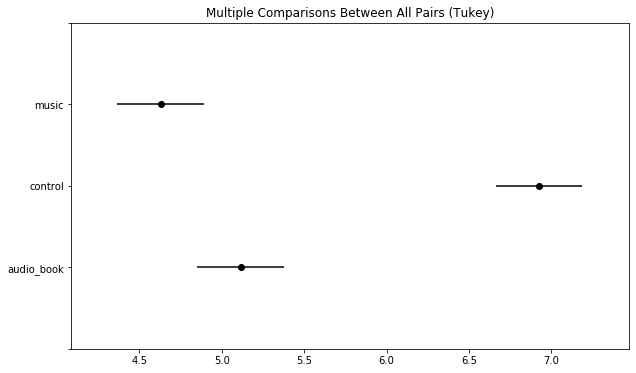

group1,group2,meandiff,p-adj,lower,upper,reject
audio_book,control,1.81,0.001,1.2838,2.3362,True
audio_book,music,-0.485,0.0779,-1.0112,0.0412,False
control,music,-2.295,0.001,-2.8212,-1.7688,True


<IPython.core.display.Javascript object>

In [39]:
tukey_results = pairwise_tukeyhsd(tall_pain["pain"], tall_pain["treatment"],)
pairwise_tukeyhsd?

# Plot results
tukey_results.plot_simultaneous()
plt.show()

# Show summary table of results
tukey_results.summary()

Our results show that the control group reported pain at a significantly higher level than both of our audio groups.  There was no difference found between the 2 audio groups.

## Switch up the Set up

Let's now say that instead of having three separate groups we only have one group of patients.  We played our subjects an audio book during a painful procedure, later we did the same painful procedure and played them nothing (our control).

We do not have independent samples in this case, so we should not use our `ttest_ind` test that assumes independence.  However, like an independent t-test, a paired t-test is still the ratio of $\frac{signal}{noise}$.

#### Our signal

Instead of comparing the difference of the 2 groups means (`mean(x1) - mean(x2)`), we take the difference of each pair's values and then take the mean of this set of differences (`mean(x1 - x2)`). 

#### Our noise

In an independent t-test our noise is a calculated to be a pooled standard error. In a paired t-test we're just looking at one value as our signal, so we'll use its standard error as the measure of noise.

In [28]:
# stats.ttest_rel()

<IPython.core.display.Javascript object>

### Performing paired t-test 'by hand'

* From the original `pain` dataframe, create a new dataframe with only the `audio_book` & `control` variables
* Create a new column that contains the difference between these two variables

In [36]:
paired_pain = pain[["audio_book", "control"]]
paired_pain["diff"] = paired_pain["audio_book"] - paired_pain["control"]

<IPython.core.display.Javascript object>

 #### Check normality assumption

Note, similar to an independent t-test, with larger sample sizes this test is robust to deviations from normality.  This robustness is more related to Type I error (i.e. we don't significantly increase risk of a false positive); with violations of this assumption we might be more at risk of a Type II error (i.e. a false negative).

* Assess whether we meet the normality assumption

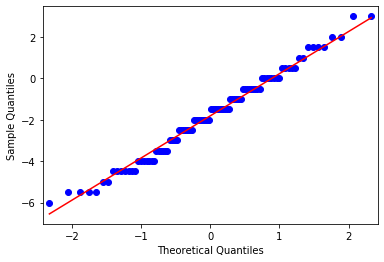

<IPython.core.display.Javascript object>

In [38]:
qqplot(paired_pain["diff"], line="s")
plt.show()

Now we'll calculate the value of `t` 'by hand'.

$$t = \frac{signal}{noise}$$

Where

$$signal = \bar{d}$$
$$noise = \frac{s_d}{\sqrt{n_d}}$$

And $d$ represents the differences between the paired samples.

In [ ]:
signal = ____
noise = ____

t = signal / noise
t

In general, that's a pretty large value of $t$.  If using our handy 1.96 we would reject the null.  In practice, it's nicer to use a pre-written function that will find $p$ for us and we can just interpret that.

### Using `scipy.stats`

In [ ]:
t, p = ____
p

### Confidence interval

Like the independent t-test, our CI formula is:

$$signal \pm scalar * noise$$

Where the $scalar$ will be a critical value related to our level of confidence.  In our examples, we've been sticking with 1.96, but this could be looked up more formally with `scipy.stats.t.ppf`.